04-`impute`
====================
- `impute` or `impute.yai` takes an imputation (object class `yai`) and an optional list of variables and returns a data frame of imputed values for specified variables. 
- Observed values can be requested. 
- In addition, new variables for reference, target, or both observations, are made for these variables using the neighbor relationships found using function `yai`.


In [12]:
install.packages("yaImpute")
library(yaImpute)
library(magrittr)
library(dplyr)

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [13]:
data(iris)
# form some test data
refs = sample(rownames(iris),50)
IDs  = c(refs,setdiff(rownames(iris),refs))

print(length(refs)) # training set
print(length(IDs))  # full set 

[1] 50
[1] 150


In [14]:

x <- iris[,1:3] # Sepal.Length Sepal.Width Petal.Length
y <- iris[refs,4:5] # Petal.Width Species

print(head(x,3))
print(head(y,3))
# build a yai object using mahalanobis


  Sepal.Length Sepal.Width Petal.Length
1          5.1         3.5          1.4
2          4.9         3.0          1.4
3          4.7         3.2          1.3
    Petal.Width    Species
45          0.4     setosa
55          1.5 versicolor
106         2.1  virginica


In [15]:
mal <- yai(x=x,y=y,method="mahalanobis")
head(mal$yRefs,3)
head(mal$xRefs,3)

,Petal.Width,Species
45,0.4,setosa
55,1.5,versicolor
106,2.1,virginica


,Sepal.Length,Sepal.Width,Petal.Length
45,5.1,3.8,1.9
55,6.5,2.8,4.6
106,7.6,3.0,6.6


In [16]:
# output a data frame of observed and imputed values
# of all variables and observations.
impute(mal) %>% head(4)
impute(mal) %>% tail(4)


,Petal.Width,Petal.Width.o,Species,Species.o
45,0.2,0.4,setosa,setosa
55,1.3,1.5,versicolor,versicolor
106,1.8,2.1,virginica,virginica
29,0.3,0.2,setosa,setosa


,Petal.Width,Petal.Width.o,Species,Species.o
147,1.5,NA,versicolor,NA
148,1.4,NA,versicolor,NA
149,2.4,NA,virginica,NA
150,1.5,NA,versicolor,NA


In [17]:
rownames(impute(mal))
length(rownames(impute(mal)))

[1] "45"  "55"  "106" "29"  "14"  "49"  "7"   "82"  "4"   "73"  "143" "24" 
 [13] "137" "112" "126" "100" "27"  "47"  "54"  "83"  "139" "125" "33"  "98" 
 [25] "44"  "12"  "102" "75"  "116" "18"  "96"  "67"  "61"  "15"  "43"  "110"
 [37] "52"  "121" "38"  "84"  "81"  "65"  "51"  "104" "11"  "58"  "69"  "131"
 [49] "127" "92"  "1"   "2"   "3"   "5"   "6"   "8"   "9"   "10"  "13"  "16" 
 [61] "17"  "19"  "20"  "21"  "22"  "23"  "25"  "26"  "28"  "30"  "31"  "32" 
 [73] "34"  "35"  "36"  "37"  "39"  "40"  "41"  "42"  "46"  "48"  "50"  "53" 
 [85] "56"  "57"  "59"  "60"  "62"  "63"  "64"  "66"  "68"  "70"  "71"  "72" 
 [97] "74"  "76"  "77"  "78"  "79"  "80"  "85"  "86"  "87"  "88"  "89"  "90" 
[109] "91"  "93"  "94"  "95"  "97"  "99"  "101" "103" "105" "107" "108" "109"
[121] "111" "113" "114" "115" "117" "118" "119" "120" "122" "123" "124" "128"
[133] "129" "130" "132" "133" "134" "135" "136" "138" "140" "141" "142" "144"
[145] "145" "146" "147" "148" "149" "150"

[1] 150

In [18]:
malImp=impute(mal,ancillaryData=iris) 

malImp <- malImp %>% mutate(IDs = as.factor(rownames(malImp) )) %>% select(IDs,everything())




In [19]:
malImp %>% head(5)
malImp %>% tail(5)

IDs,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length.o,Sepal.Width.o,Petal.Length.o,Petal.Width.o,Species,Species.o
45,5.1,3.8,1.6,0.2,5.1,3.8,1.9,0.4,setosa,setosa
55,6.4,2.9,4.3,1.3,6.5,2.8,4.6,1.5,versicolor,versicolor
106,7.2,3.2,6.0,1.8,7.6,3.0,6.6,2.1,virginica,virginica
29,5.1,3.5,1.4,0.3,5.2,3.4,1.4,0.2,setosa,setosa
14,4.6,3.1,1.5,0.2,4.3,3.0,1.1,0.1,setosa,setosa


,IDs,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length.o,Sepal.Width.o,Petal.Length.o,Petal.Width.o,Species,Species.o
146,146,6.4,3.2,4.5,1.5,6.7,3.0,5.2,2.3,versicolor,virginica
147,147,6.3,2.5,4.9,1.5,6.3,2.5,5.0,1.9,versicolor,virginica
148,148,6.1,3.0,4.6,1.4,6.5,3.0,5.2,2.0,versicolor,virginica
149,149,6.3,3.4,5.6,2.4,6.2,3.4,5.4,2.3,virginica,virginica
150,150,5.6,3.0,4.5,1.5,5.9,3.0,5.1,1.8,versicolor,virginica


In [20]:

malImp <- malImp %>% mutate(IDs =as.numeric(IDs)) %>% arrange(IDs) 

malImp %>% head(10)


IDs,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length.o,Sepal.Width.o,Petal.Length.o,Petal.Width.o,Species,Species.o
1,5.1,3.5,1.4,0.3,5.1,3.5,1.4,0.2,setosa,setosa
2,5.1,3.3,1.7,0.5,4.9,3.1,1.5,0.1,setosa,setosa
3,5.6,2.9,3.6,1.3,5.7,2.8,4.1,1.3,versicolor,versicolor
4,6.3,3.4,5.6,2.4,6.3,3.3,6.0,2.5,virginica,virginica
5,5.8,2.7,5.1,1.9,5.8,2.7,5.1,1.9,virginica,virginica
6,7.2,3.2,6.0,1.8,7.1,3.0,5.9,2.1,virginica,virginica
7,6.0,3.0,4.8,1.8,6.3,2.9,5.6,1.8,virginica,virginica
8,6.3,2.9,5.6,1.8,6.5,3.0,5.8,2.2,virginica,virginica
9,7.2,3.2,6.0,1.8,7.6,3.0,6.6,2.1,virginica,virginica
10,5.8,2.7,5.1,1.9,4.9,2.5,4.5,1.7,virginica,virginica


In [21]:
table(malImp[,10],malImp[,9])

            
             0.1 0.2 0.3 0.4 0.5 0.6  1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9  2
  setosa       5  29   6   7   1   1  0   0   0   0   0   0   0   0   0   0  0
  versicolor   0   0   1   0   0   0  7   3   2  13   5   9   0   1   4   1  2
  virginica    0   0   0   0   0   0  0   0   3   0   3   3   4   1   8   4  4
            
             2.1 2.2 2.3 2.4 2.5
  setosa       0   0   0   0   0
  versicolor   1   0   2   0   0
  virginica    5   3   6   3   3

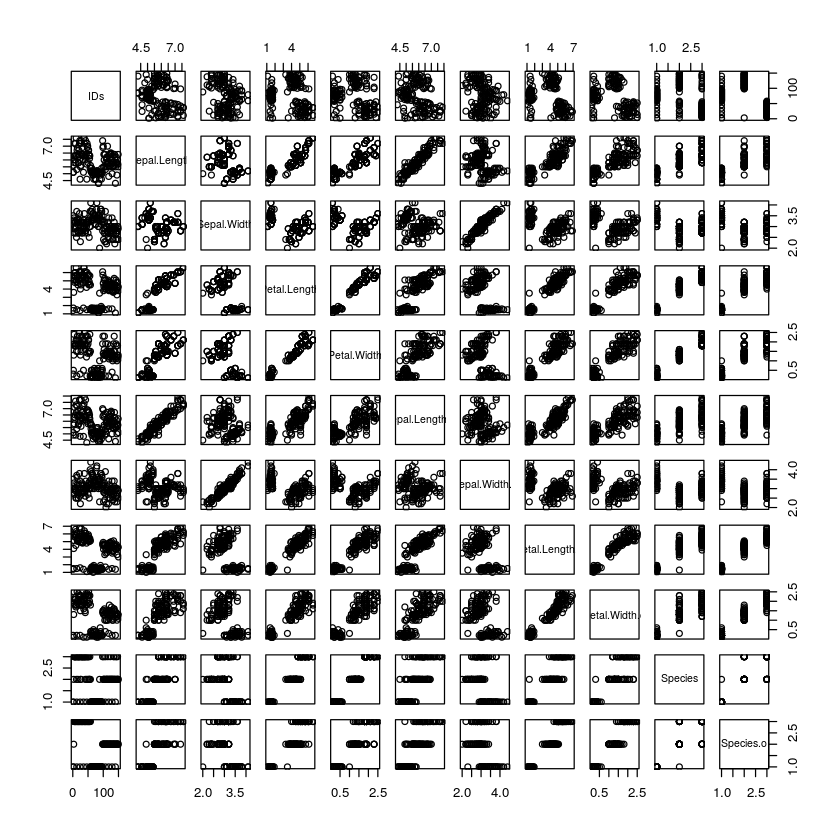

In [22]:
plot(malImp)